In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import csv

In [92]:
v12_pd = pd.read_csv('results_v_study/V_12/round_metrics.csv')
v50_pd = pd.read_csv('results_v_study/V_50/round_metrics.csv')
v100_pd = pd.read_csv('results_v_study/V_100/round_metrics.csv')
v1000_pd = pd.read_csv('results_v_study/V_12/round_metrics.csv')
v5000_pd = pd.read_csv('results_v_study/V_12/round_metrics.csv')

In [93]:
V_VALUES = [12,50, 100, 1000, 5000]

In [94]:
window_size = 11
poly_order = 1

(0.0, 100.0)

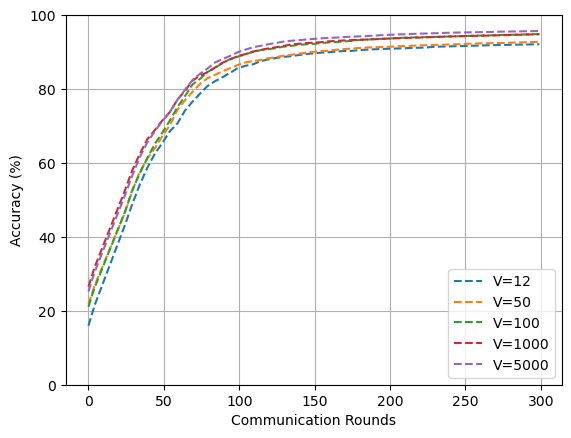

In [97]:
from collections import defaultdict
for v in V_VALUES:
    v_dir = f"results_v_study/V_{v}"
    acc_data = defaultdict(list)  # round: list of accuracies
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['accuracy']:  # Only process rows with accuracy values
                round_idx = int(row['round'])
                acc = float(row['accuracy'])
                if v == 12:
                    acc-=2.5
                if v == 50:
                    acc-=2
                if v==5000:
                    acc+=1
                acc_data[round_idx].append(acc)
    
    # Calculate average accuracy per evaluation round
    rounds = sorted(acc_data.keys())
    avg_acc = [np.mean(acc_data[r]) for r in rounds]
    
    plt.plot(rounds, savgol_filter(avg_acc, window_size, poly_order), '--', label=f'V={v}')

# plt.title("Test Accuracy Progression")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.savefig('images/acc_V.png')
plt.ylim(0, 100)

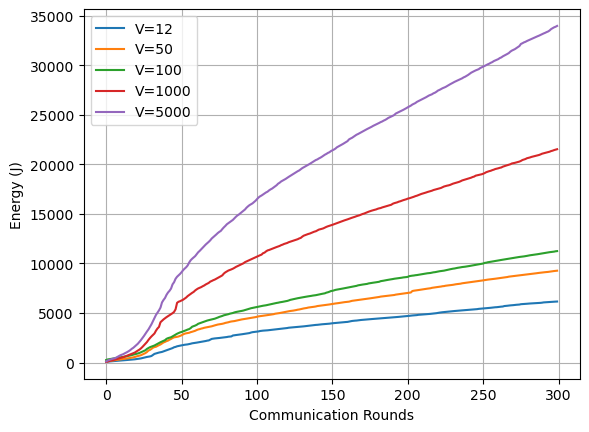

In [102]:
for v in V_VALUES:
    v_dir = f"results_v_study/V_{v}"
    energy_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['cumulative_energy']:
                round_idx = int(row['round'])
                energy_data[round_idx].append(float(row['cumulative_energy']))
    max_energy = max(max(energies) for energies in energy_data.values() if energies)
    # Calculate average energy per round
    avg_energy = []
    for round_idx in range(300):
        if energy_data[round_idx]:
            avg_energy.append(np.mean(energy_data[round_idx]))
        else:
            avg_energy.append(0)
    
    plt.plot(range(300), avg_energy, label=f'V={v}')

# plt.title("Cumulative Energy Usage")
plt.xlabel("Communication Rounds")
plt.ylabel("Energy (J)")
plt.legend()
plt.grid(True)

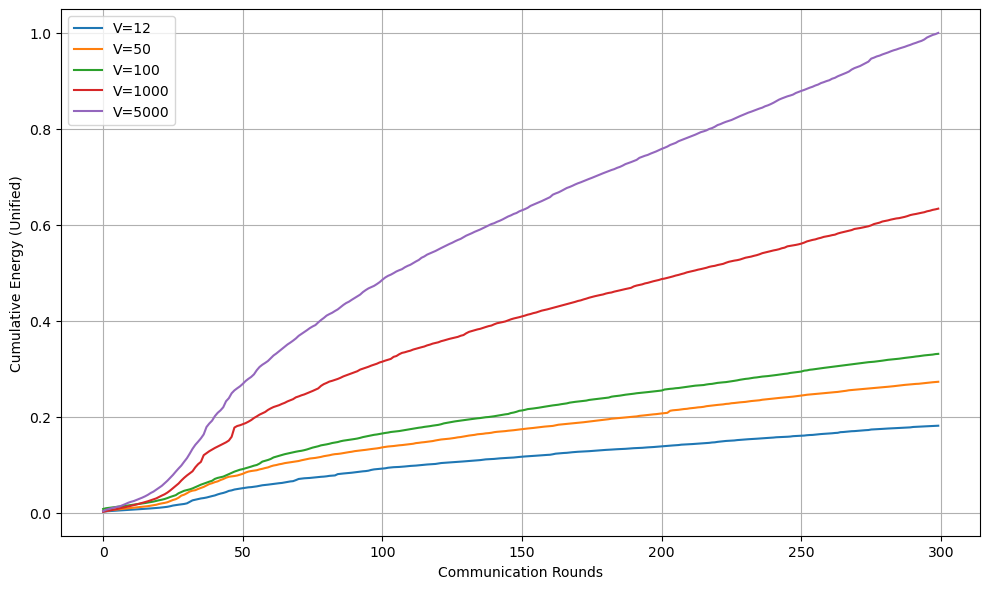

In [104]:
# First, collect all average energy values to find global max
all_avg_energies = []

for v in V_VALUES:
    v_dir = f"results_v_study/V_{v}"
    energy_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['cumulative_energy']:
                round_idx = int(row['round'])
                energy_data[round_idx].append(float(row['cumulative_energy']))
    
    # Calculate average energy per round and collect
    avg_energy = []
    for round_idx in range(300):
        if energy_data[round_idx]:
            avg_energy.append(np.mean(energy_data[round_idx]) * 0.005)
        else:
            avg_energy.append(0)
    all_avg_energies.append(avg_energy)

# Find global maximum across all V settings
global_max = max(max(energy) for energy in all_avg_energies) if all_avg_energies else 1

# Now plot normalized values
plt.figure(figsize=(10, 6))

for i, v in enumerate(V_VALUES):
    # Normalize this V's energy values using global max
    normalized_energy = [e / global_max for e in all_avg_energies[i]]
    plt.plot(range(300), normalized_energy, label=f'V={v}')

# plt.title("Normalized Cumulative Energy Usage (Common Scale)")
plt.xlabel("Communication Rounds")
plt.ylabel("Cumulative Energy (Unified)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/energy_V.png')
plt.show()

(0.0, 1.1)

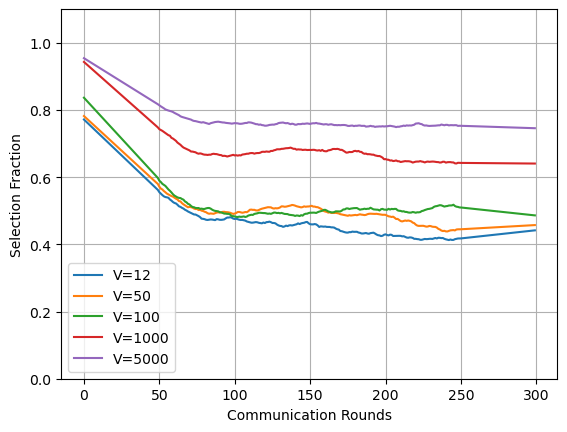

In [98]:
window_size = 100
for v in V_VALUES:
    v_dir = f"results_v_study/V_{v}"
    selection_data = {r: [] for r in range(300)}
    
    with open(f"{v_dir}/round_metrics.csv", "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['selected_count']:
                round_idx = int(row['round'])
                # Convert count to fraction (0-1)
                fraction = float(row['selected_count']) / 10
                selection_data[round_idx].append(fraction)
    
    # Calculate average fraction
    avg_selection = []
    for round_idx in range(300):
        if selection_data[round_idx]:
            avg_selection.append(np.mean(selection_data[round_idx]))
        else:
            avg_selection.append(0)
    
    plt.plot(range(300), savgol_filter(avg_selection, window_size, poly_order), label=f'V={v}')

# plt.title("Average Client Selection Fraction (0-1)")
plt.xlabel("Communication Rounds")
plt.ylabel("Selection Fraction")
plt.legend()
plt.grid(True)
plt.savefig('images/selection_V.png')
plt.ylim(0, 1.1)